# Chapter 5 figures and moments

In [3]:
import Pkg; Pkg.activate(joinpath(@__DIR__, "..")); 
Pkg.instantiate()

  Activating environment at `~/Github/TheEconomicsofSovereignDebt/Project.toml`
Precompiling project...
  ✓ Plots
  ✓ LTBonds
  2 dependencies successfully precompiled in 39 seconds (173 already precompiled)


In [4]:
using LTBonds 
using Plots
using LaTeXStrings 
using Random 
using PrettyTables

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1342


In [5]:
include(joinpath(@__DIR__, "plotting_functions.jl"))

plot_pol (generic function with 1 method)

In [ ]:
pretty_table_output = :html # change to :text if running from terminal 

In [6]:
penaltyAG06 = DefCosts(pen1 =0.02, pen2 = 0.0, quadratic = true, reentry = 0.0385)
penaltyCE12 = DefCosts(pen1 = -0.1881927550, pen2 = 0.2455843389, quadratic = true, reentry = 0.0385)
penaltyAr08 = DefCosts(pen1=0.0, pen2=0.0, threshold = 0.969, quadratic = false, reentry = 0.0385)
#Faster Re-entry
penaltyAG06Fast = DefCosts(pen1 =0.02, pen2 = 0.0, quadratic = true, reentry = 0.282)
penaltyCE12Fast = DefCosts(pen1 = -0.1881927550, pen2 = 0.2455843389, quadratic = true, reentry = 0.282)
penaltyAr08Fast = DefCosts(pen1=0.0, pen2=0.0,threshold = 0.969, quadratic = false, reentry = 0.282)

DefCosts{Float64}(0.0, 0.0, 0.969, false, 0.282)

In [7]:
modelAG06, modelCE12, modelAr08, modelAG06Fast, modelCE12Fast, modelAr08Fast = map((penaltyAG06,penaltyCE12,penaltyAr08, penaltyAG06Fast,penaltyCE12Fast,penaltyAr08Fast)) do penalty
    R = 1.01
    β = 0.9540232420
    pref = Preferences(β = β, u = make_CRRA(ra = 2))
    y = discretize(YProcess(n = 200, ρ = 0.948503, std = 0.027092, μ = 0.0, span = 3.0, tails = false))
    m = MTruncatedNormal(; std =  10e-10, span = 2.0)
    bond = BondCE2012(n = 350, min = 0.0, max = 1.5, κ = 0.0, λ = 1.0)
    penalty = penalty
    generate_workspace(LTBondModel(
        y = y,
        m = m, 
        preferences = pref, 
        bond = bond, 
        def_costs = penalty, 
        R = R
    ))
end;

In [8]:
#Impatient Government
modelAG06IMP, modelCE12IMP, modelAr08IMP = map((penaltyAG06,penaltyCE12,penaltyAr08)) do penalty
    R = 1.01
    β = 0.8
    pref = Preferences(β = β, u = make_CRRA(ra = 2))
    y = discretize(YProcess(n = 200, ρ = 0.948503, std = 0.027092, μ = 0.0, span = 3.0, tails = false))
    m = MTruncatedNormal(; std =  10e-10, span = 2.0)
    bond = BondCE2012(n = 350, min = 0.0, max = 1.5, κ = 0.0, λ = 1.0)
    penalty = penalty
    generate_workspace(LTBondModel(
        y = y,
        m = m, 
        preferences = pref, 
        bond = bond, 
        def_costs = penalty, 
        R = R
    ))
end;

In [9]:
for m in (modelAG06, modelCE12, modelAr08, modelAG06Fast, modelCE12Fast, modelAr08Fast, modelAG06IMP, modelCE12IMP, modelAr08IMP)
    @time solve!(m; max_iters = 10000, g = 1.0, err = 1e-10, print_every = 50)
end 

1: (v = 1.5472459116723911, q = 8.881784197001252e-16, vD = 0.7322080491049583)
51: (v = 0.01617999922259372, q = 0.9899735793253488, vD = 0.004155175140439837)
101: (v = 0.004104191309902916, q = 0.20027480611712845, vD = 0.001997984525463181)
151: (v = 0.0009058995437740691, q = 0.03927653540157083, vD = 0.000450544107653883)
201: (v = 0.00022183172943357476, q = 0.047951964389302826, vD = 8.699798290834337e-5)
251: (v = 1.5526188995806933e-5, q = 0.0, vD = 1.2783395789028873e-5)
301: (v = 1.458282103072861e-6, q = 0.0, vD = 1.4231867773162321e-6)
351: (v = 1.3857570380082507e-7, q = 0.0, vD = 1.3811606081048922e-7)
401: (v = 1.3169554335945577e-8, q = 0.0, vD = 1.3164086709593903e-8)
451: (v = 1.2515997127593437e-9, q = 0.0, vD = 1.2515677383362345e-9)
501: (v = 1.1898038110302878e-10, q = 0.0, vD = 1.1895551210727717e-10)
505: (v = 9.85629355909623e-11, q = 0.0, vD = 9.85416193088895e-11)
Converged.
 50.787232 seconds (21.91 M allocations: 1.229 GiB, 1.35% gc time, 23.47% compilati

In [10]:
function get_Bbars(m)
    bbar=[findfirst(get_d_pol(m)[:,i].==m.model.m.m_min) for i in 1:length(get_y_grid(m))]
    bbaridx=replace(bbar, nothing =>length(get_b_grid(m)))
    bbar=[get_b_grid(m)[x] for x in bbaridx]
    return(bbaridx',bbar')
end

get_Bbars (generic function with 1 method)

## Figures

In [28]:
ygrid=get_y_grid(modelAG06)
get_ydef(ws)=ws.cache.cdef

get_ydef (generic function with 1 method)

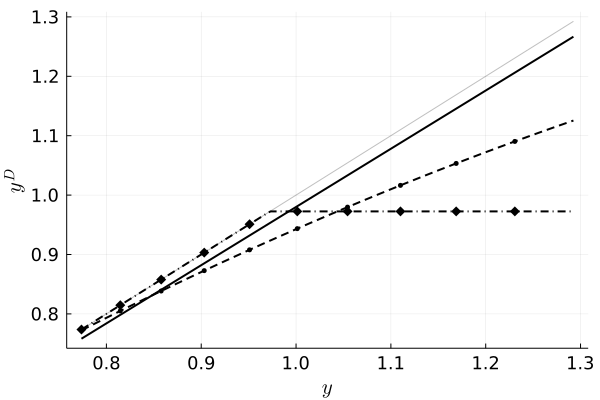

In [29]:
#Figure 5.1: Endowment  in Default
f = plot(ygrid,ygrid,line=(lw45, :gray),legend=false, 
xlabel=(L"$y$"), ylabel=(L"$y^D$"))
plot!(f,ygrid,get_ydef(modelAG06),line=(lw, :black))
plot!(f,ygrid,get_ydef(modelCE12),line=(lw,:dash, :black),st = :samplemarkers, step = 20, markercolor=:black, shape = :circle, markersize=ms)
plot!(f,ygrid, get_ydef(modelAr08),line=(lw,:dashdot, :black),st = :samplemarkers, step = 20, markercolor=:black, shape = :diamond, markersize=msdiamond)
savefig(f, (joinpath(@__DIR__,"..","output","Chapter5","fig_5_1.pdf" )))
f

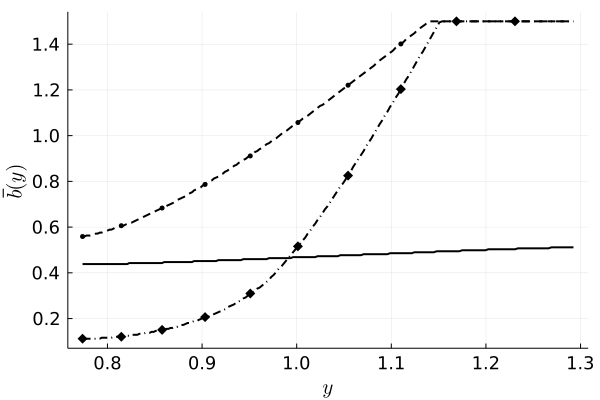

In [30]:
# Figure 5.2: Deadweight Costs of Default
f = plot(ygrid, get_Bbars(modelAG06)[2][:],line=(lw,:black), xlabel=(L"$y$"),ylabel= (L"$\overline{b}(y)$"), legend=false);
plot!(ygrid, get_Bbars(modelCE12)[2][:],line=(lw,:dash, :black),st = :samplemarkers, step = 20, markercolor=:black, shape = :circle, markersize=ms)
plot!(ygrid, get_Bbars(modelAr08)[2][:],line=(lw,:dashdot, :black), st = :samplemarkers, step = 20, markercolor=:black, shape = :diamond, markersize=msdiamond)
savefig(f, (joinpath(@__DIR__,"..","output","Chapter5","fig_5_2.pdf" )))
f

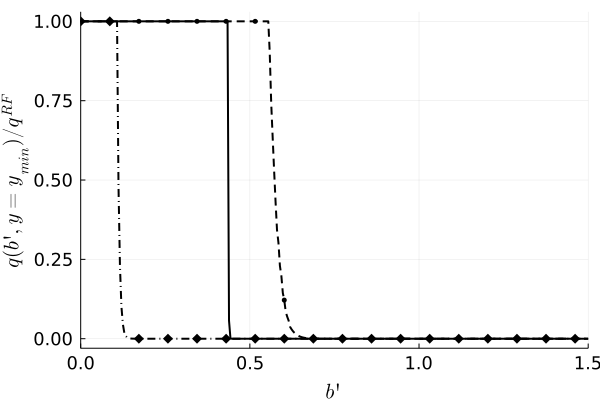

In [31]:
# Figure 5.3:  Price Schedules
#plot prices at lowest Y (Figure 5.3 (a))
f=plot_q(1, modelAG06, modelCE12, modelAr08)
plot!(ylabel = (L"$q(b',y=y_{min})/q^{RF}$"))
savefig(f, (joinpath(@__DIR__,"..","output","Chapter5","fig_5_3a.pdf" )))
f

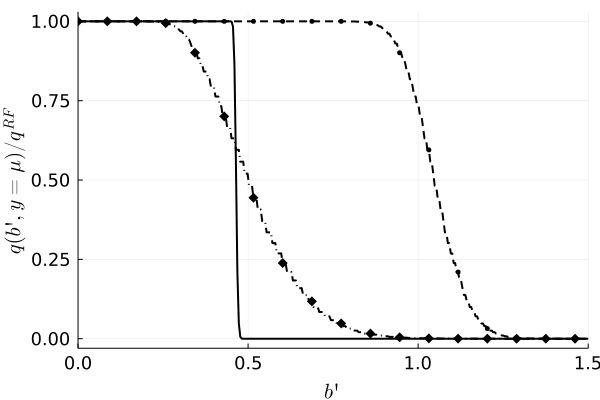

In [32]:
#plot prices at mean Y (Figure 5.3 (b))
midY = length(ygrid) ÷ 2
f=plot_q(midY, modelAG06, modelCE12, modelAr08)
plot!(ylabel = (L"$q(b',y=\mu)/q^{RF}$"))
savefig(f, (joinpath(@__DIR__,"..","output","Chapter5","fig_5_3b.pdf" )))
f

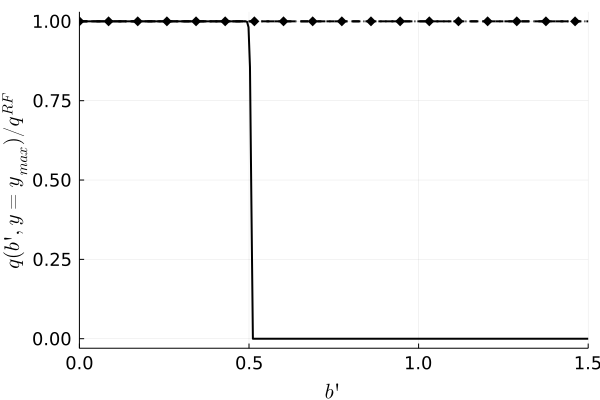

In [33]:
#plot prices at max Y (Figure 5.3 (c))
f=plot_q(length(ygrid),  modelAG06, modelCE12, modelAr08)
plot!(ylabel = (L"$q(b',y=y_{max})/q^{RF}$"))
savefig(f, (joinpath(@__DIR__,"..","output","Chapter5","fig_5_3c.pdf" )))
f

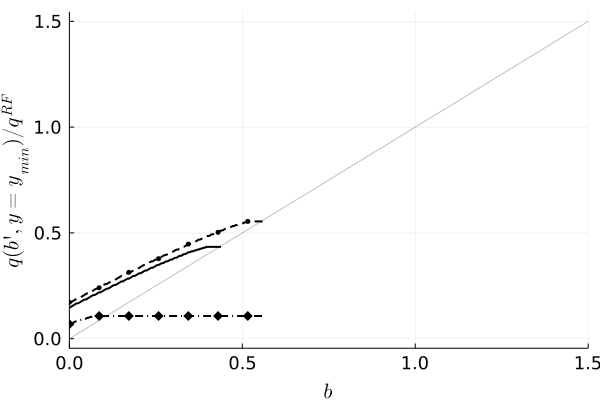

In [34]:
# Figure 5.4 Policy Functions
#plot policies at lowest Y (Figure 5.4 (a))
f=plot_pol(1, modelAG06, modelCE12, modelAr08,get_Bbars(modelAG06)[1][1],get_Bbars(modelCE12)[1][1],get_Bbars(modelCE12)[1][1])
plot!(ylabel = (L"$q(b',y=y_{min})/q^{RF}$"))
savefig(f, (joinpath(@__DIR__,"..","output","Chapter5","fig_5_4a.pdf" )))
f

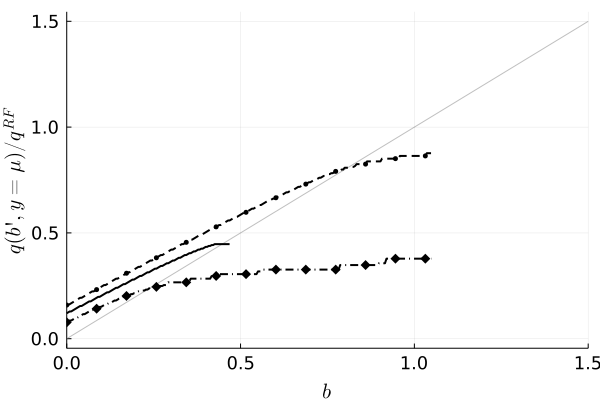

In [35]:
#plot policies at mean Y (Figure 5.4 (b))
midY = length(ygrid) ÷ 2
f=plot_pol(midY, modelAG06, modelCE12, modelAr08,get_Bbars(modelAG06)[1][midY],get_Bbars(modelCE12)[1][midY],get_Bbars(modelCE12)[1][midY])
plot!(ylabel = (L"$q(b',y=\mu )/q^{RF}$"))
savefig(f, (joinpath(@__DIR__,"..","output","Chapter5","fig_5_4b.pdf" )))
f

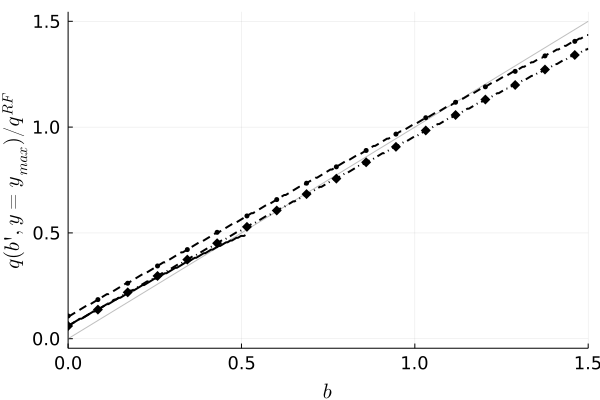

In [36]:
#plot policies at max Y (Figure 5.4 (c))
f=plot_pol(length(ygrid),  modelAG06, modelCE12, modelAr08,get_Bbars(modelAG06)[1][end],get_Bbars(modelCE12)[1][end],get_Bbars(modelCE12)[1][end])
plot!(ylabel = (L"$q(b',y=y_{max})/q^{RF}$"))
savefig(f, (joinpath(@__DIR__,"..","output","Chapter5","fig_5_4c.pdf" )))
f

## Simulations 

In [37]:
###simulations
big_T = 20_000 
big_N = 1_000
rng = Random.seed!(1234)

MersenneTwister(1234)

In [38]:
@time shocks, paths = create_shocks_paths(modelAG06, big_T, big_N; rng);

  2.956424 seconds (63.02 k allocations: 3.091 GiB, 37.63% gc time)


In [39]:
moments_AG, moments_CE, moments_Ar =map((modelAG06, modelCE12, modelAr08)) do m
    @time simulation!(paths, shocks, m; n = big_T, trim = 1000, trim_def = 20)
    moments(paths, m)
end;

  0.259217 seconds (7.01 k allocations: 984.766 KiB)
  0.115290 seconds (7.12 k allocations: 994.297 KiB)
  0.121004 seconds (7.12 k allocations: 993.938 KiB)


In [47]:
#Table 5.2
pretty_table(
    [
        pairs(moments_AG),
        pairs(moments_CE),
        pairs(moments_Ar)
    ],
    row_names = ["Linear", "Quadratic", "Threshold"],
    backend = Val(pretty_table_output)
)

,mean_bp_y,mean_mv_y,def_rate,mean_spread,std_spread,std_c_y,cor_tb_y,cor_r_y,cor_r_b_y,cor_r_tb
Linear,0.0685479,0.0678543,0.00086942,0.000886326,0.00197582,1.00308,-0.112843,-0.0966332,0.450935,-0.281171
Quadratic,0.134815,0.133255,0.00850702,0.00899057,0.00949767,1.04541,-0.189928,-0.670439,-0.6105,0.626378
Threshold,0.0447405,0.0440777,0.032675,0.0365458,0.0496228,1.03413,-0.141976,-0.140905,-0.250702,0.516168


In [41]:
moments_AG, moments_CE, moments_Ar =map((modelAG06IMP, modelCE12IMP, modelAr08IMP)) do m
    @time simulation!(paths, shocks, m; n = big_T, trim = 1000, trim_def = 20)
    moments(paths, m)
end

  0.086612 seconds (7.01 k allocations: 985.094 KiB)
  0.104833 seconds (7.12 k allocations: 993.969 KiB)
  0.088328 seconds (7.12 k allocations: 993.906 KiB)


((mean_bp_y = 0.5469982525907342, mean_mv_y = 0.5414704515649158, def_rate = 0.0008396569627675543, mean_spread = 0.000887745517626007, std_spread = 0.001412824571399268, std_c_y = 1.0087925813583503, cor_tb_y = -0.24116834401261344, cor_r_y = 0.2684796185581363, cor_r_b_y = -0.2500772433275191, cor_r_tb = -0.30538072168164393), (mean_bp_y = 0.563378216696765, mean_mv_y = 0.5548143078857166, def_rate = 0.02144366077580262, mean_spread = 0.022837073124920372, std_spread = 0.010819924620592523, std_c_y = 1.17718384106995, cor_tb_y = -0.14604770144579554, cor_r_y = -0.11094913807537711, cor_r_b_y = -0.10308882516101141, cor_r_tb = 0.7783644094446022), (mean_bp_y = 0.20659544244314448, mean_mv_y = 0.19901495166247762, def_rate = 0.13561672690227566, mean_spread = 0.17040924097435187, std_spread = 0.12435568780148873, std_c_y = 1.2356373903476687, cor_tb_y = -0.08626911238250291, cor_r_y = -0.2971907385220999, cor_r_b_y = -0.42293920741478724, cor_r_tb = 0.6281613042934032))

In [46]:
#Table 5.3
pretty_table(
    [
        pairs(moments_AG),
        pairs(moments_CE),
        pairs(moments_Ar)
    ],
    row_names = ["Linear", "Quadratic", "Threshold"],
    backend = Val(pretty_table_output)
)

,mean_bp_y,mean_mv_y,def_rate,mean_spread,std_spread,std_c_y,cor_tb_y,cor_r_y,cor_r_b_y,cor_r_tb
Linear,0.0685479,0.0678543,0.00086942,0.000886326,0.00197582,1.00308,-0.112843,-0.0966332,0.450935,-0.281171
Quadratic,0.134815,0.133255,0.00850702,0.00899057,0.00949767,1.04541,-0.189928,-0.670439,-0.6105,0.626378
Threshold,0.0447405,0.0440777,0.032675,0.0365458,0.0496228,1.03413,-0.141976,-0.140905,-0.250702,0.516168


In [43]:
moments_AG, moments_CE, moments_Ar =map((modelAG06Fast, modelCE12Fast, modelAr08Fast)) do m
    @time simulation!(paths, shocks, m; n = big_T, trim = 1000, trim_def = 20)
    moments(paths, m)
end

  0.096229 seconds (7.01 k allocations: 984.766 KiB)
  0.108799 seconds (7.12 k allocations: 993.906 KiB)
  0.113328 seconds (7.12 k allocations: 993.906 KiB)


((mean_bp_y = 0.06854788236716125, mean_mv_y = 0.0678543289950076, def_rate = 0.0008694204905229652, mean_spread = 0.0008863257638188303, std_spread = 0.001975816839866881, std_c_y = 1.003076163893641, cor_tb_y = -0.11284252554979247, cor_r_y = -0.09663315435056018, cor_r_b_y = 0.45093524422436526, cor_r_tb = -0.28117086188823803), (mean_bp_y = 0.1348145139935902, mean_mv_y = 0.13325542457734196, def_rate = 0.008507024455307266, mean_spread = 0.008990573586817062, std_spread = 0.009497666921163543, std_c_y = 1.0454105923336268, cor_tb_y = -0.18992835082912848, cor_r_y = -0.6704386456146934, cor_r_b_y = -0.6104996354472729, cor_r_tb = 0.6263779598174142), (mean_bp_y = 0.04474053710234672, mean_mv_y = 0.04407774479737264, def_rate = 0.032675036109367284, mean_spread = 0.03654578564417843, std_spread = 0.04962283264494296, std_c_y = 1.0341323238934492, cor_tb_y = -0.14197551624090035, cor_r_y = -0.14090491091641985, cor_r_b_y = -0.25070215640544413, cor_r_tb = 0.5161678250484366))

In [45]:
#Table 5.4
pretty_table(
    [
        pairs(moments_AG),
        pairs(moments_CE),
        pairs(moments_Ar)
    ],
    row_names = ["Linear", "Quadratic", "Threshold"],
    backend = Val(pretty_table_output)
)

,mean_bp_y,mean_mv_y,def_rate,mean_spread,std_spread,std_c_y,cor_tb_y,cor_r_y,cor_r_b_y,cor_r_tb
Linear,0.0685479,0.0678543,0.00086942,0.000886326,0.00197582,1.00308,-0.112843,-0.0966332,0.450935,-0.281171
Quadratic,0.134815,0.133255,0.00850702,0.00899057,0.00949767,1.04541,-0.189928,-0.670439,-0.6105,0.626378
Threshold,0.0447405,0.0440777,0.032675,0.0365458,0.0496228,1.03413,-0.141976,-0.140905,-0.250702,0.516168
